<a href="https://colab.research.google.com/github/devdastl/-EVA-8_Phase-1_Assignment-4/blob/main/step_1/EVA_assignment_4_step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First code version setup in building the Neural Network
## **Target**
Following are the targets for first code setup.
1. Get the setup correct and working. Because it is required to have basic working code for training and evaluation. 
  - setup basic data transformations like normalization.
  - setup data loader for training and testing.
  - setup training and evaluation loop
2. Build CNN architecture/skeleton to have `<10,000` parameters. Because assignment strongly mentions to have less then 10k parameters, so building larger CNN model is useless and will cause problem in follow-up code setup.

## **Result**
Below are the results of first code setup.
1. Total number of parameters - `9,734 (<10k)`
1. Training accuracy at 15th epoch - `98.81%`
1. Testing accuracy at 15th epoch - `98.62%`
1. Training accuracy at 20th epoch - `99.0%`
1. Testing accuracy at 20th epoch - `98.73%` 

## **Analysis**
Following are the analysis of this first code setup:
1. We build a CNN which is able to train under 10k parameter.
2. Highest train and test accuracy (20th epoch) is 99.0% and 98.73% resp. which is very less. Accuracy can be further improved.
3. Based on accuracy, model seems to be overfitting as training accuracy is larger then testing accruacy.

## Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations
We will start with basic transformation like normalizing the image and converting the image into pytorch Tensor.
- First transform convert dataset into pytorch tensor.
- Second transform will normalize the image by using mean and standerd deviation of complete dataset. We can use numpy to calculate this values as shown in cell 5.

output of cell 5 after commenting `transforms.Normalize` transformation.
```
[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - "mean: tensor(0.1307)"
 - "std: tensor(0.3081)"
 - var: tensor(0.0949)
torch.Size([128, 1, 28, 28])
torch.Size([128])
```
As shown above it gives values 0.1307 as mean and 0.3081 as standerd deviation.

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


## Dataset and Creating Train/Test Split
Here we are creating pytorch dataset set class for train and test set.

In [4]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## GPU and data loader setup
In below cell first we are checking if cuda devices(GPU) are available as well as we are setting up data loader for train and test set which will create batches of the set for training.

In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Statistics and Data visualization
Here we will look at some information about the data as well as we will visualize it to get more information about our data

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


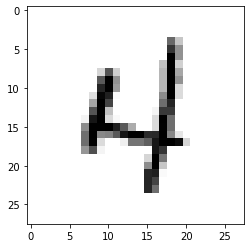

In [6]:
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


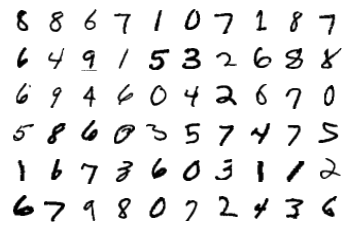

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Model architecture
Here the CNN model just uses convolution, pooling and activation. One focus while building this architecture is to keep the parameters under 10k.

NOTE: Model architecture and receptive field calcuation is also shown in the github README.

In [63]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
      # First block of CNN--------------
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 26
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 24
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 22

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 11

        # Second block of CNN---------------
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 9

        # Third block of CNN---------------
        self.layer6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # Forth block of CNN---------------
        self.layer7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 5
        self.layer8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 5

        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5)
        ) # output_size = 1x1x10 



    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.pool1(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)

        x=self.gap(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model visualization
Here we are using external tool `torchsummary` to visualize our model architecture as well as the number of paramters (which are under 10k).

In [64]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 14, 24, 24]           1,260
              ReLU-4           [-1, 14, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           2,016
              ReLU-6           [-1, 16, 22, 22]               0
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8           [-1, 10, 11, 11]             160
              ReLU-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 16, 9, 9]           1,440
             ReLU-11             [-1, 16, 9, 9]               0
           Conv2d-12             [-1, 16, 7, 7]           2,304

# Training and Testing

In this cell we have writtern training and testing loop which will go through each batch of loader and will perfrom a forward pass and then gradient calcuation.

In [65]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

## Model training
Here we will loop through epoch and call our train and test functions which we have already defined.

In [67]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=2.1425838470458984 Batch_id=468 Accuracy=10.43: 100%|██████████| 469/469 [00:14<00:00, 33.17it/s]



Test set: Average loss: 2.0943, Accuracy: 3272/10000 (32.72%)

EPOCH: 1


Loss=0.1923002004623413 Batch_id=468 Accuracy=83.00: 100%|██████████| 469/469 [00:13<00:00, 34.26it/s]



Test set: Average loss: 0.1591, Accuracy: 9527/10000 (95.27%)

EPOCH: 2


Loss=0.07427065819501877 Batch_id=468 Accuracy=95.65: 100%|██████████| 469/469 [00:14<00:00, 31.51it/s]



Test set: Average loss: 0.0997, Accuracy: 9699/10000 (96.99%)

EPOCH: 3


Loss=0.09153679013252258 Batch_id=468 Accuracy=96.79: 100%|██████████| 469/469 [00:13<00:00, 34.23it/s]



Test set: Average loss: 0.0792, Accuracy: 9776/10000 (97.76%)

EPOCH: 4


Loss=0.055501025170087814 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:13<00:00, 34.38it/s]



Test set: Average loss: 0.0674, Accuracy: 9792/10000 (97.92%)

EPOCH: 5


Loss=0.03139936551451683 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:13<00:00, 34.60it/s]



Test set: Average loss: 0.0697, Accuracy: 9787/10000 (97.87%)

EPOCH: 6


Loss=0.013772371225059032 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:13<00:00, 34.47it/s]



Test set: Average loss: 0.0572, Accuracy: 9828/10000 (98.28%)

EPOCH: 7


Loss=0.033034224063158035 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:13<00:00, 34.53it/s]



Test set: Average loss: 0.0564, Accuracy: 9819/10000 (98.19%)

EPOCH: 8


Loss=0.010888413526117802 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:13<00:00, 34.48it/s]



Test set: Average loss: 0.0463, Accuracy: 9868/10000 (98.68%)

EPOCH: 9


Loss=0.1036553904414177 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:13<00:00, 34.26it/s]



Test set: Average loss: 0.0495, Accuracy: 9845/10000 (98.45%)

EPOCH: 10


Loss=0.01860908418893814 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:14<00:00, 31.96it/s]



Test set: Average loss: 0.0510, Accuracy: 9828/10000 (98.28%)

EPOCH: 11


Loss=0.061815518885850906 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:17<00:00, 26.30it/s]



Test set: Average loss: 0.0425, Accuracy: 9865/10000 (98.65%)

EPOCH: 12


Loss=0.022363267838954926 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:15<00:00, 30.47it/s]



Test set: Average loss: 0.0417, Accuracy: 9862/10000 (98.62%)

EPOCH: 13


Loss=0.03080018423497677 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:18<00:00, 25.40it/s]



Test set: Average loss: 0.0399, Accuracy: 9877/10000 (98.77%)

EPOCH: 14


Loss=0.01706814393401146 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:13<00:00, 33.95it/s]



Test set: Average loss: 0.0407, Accuracy: 9866/10000 (98.66%)

EPOCH: 15


Loss=0.04032474011182785 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:16<00:00, 28.99it/s]



Test set: Average loss: 0.0483, Accuracy: 9862/10000 (98.62%)

EPOCH: 16


Loss=0.015822136774659157 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:15<00:00, 29.90it/s]



Test set: Average loss: 0.0454, Accuracy: 9847/10000 (98.47%)

EPOCH: 17


Loss=0.014149848371744156 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:16<00:00, 28.67it/s]



Test set: Average loss: 0.0531, Accuracy: 9826/10000 (98.26%)

EPOCH: 18


Loss=0.011593938805162907 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:15<00:00, 30.73it/s]



Test set: Average loss: 0.0374, Accuracy: 9883/10000 (98.83%)

EPOCH: 19


Loss=0.019670585170388222 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:15<00:00, 30.02it/s]



Test set: Average loss: 0.0354, Accuracy: 9873/10000 (98.73%)



## Result visualization
Here we will visualize or plot graphs for train and test loss and accuracy with respect to the number of iteration. (1 iteration = pass from 1 batch)

In [83]:
import numpy as np
train_loss_list = np.array([num.item() for num in train_losses ])


[2.2998197032928465, 0.24324802865982056, 0.13762153458595275, 0.09118912959098815, 0.0720218839392066, 0.0773188881635666, 2.094262884902954, 0.1591427517414093, 0.09972114050388337, 0.07920498745441437, 0.06739839587211609, 0.06969659759700299, 0.05715935915112495, 0.05641697959154844, 0.04628944398164749, 0.04947193595170975, 0.05100151982530952, 0.04245066253989935, 0.04170705973468721, 0.03985324161946774, 0.04071280797123909, 0.048258634328842163, 0.045368830264173446, 0.05313816448939033, 0.037446889007114806, 0.03544113716017455]


Text(0.5, 1.0, 'Test Accuracy')

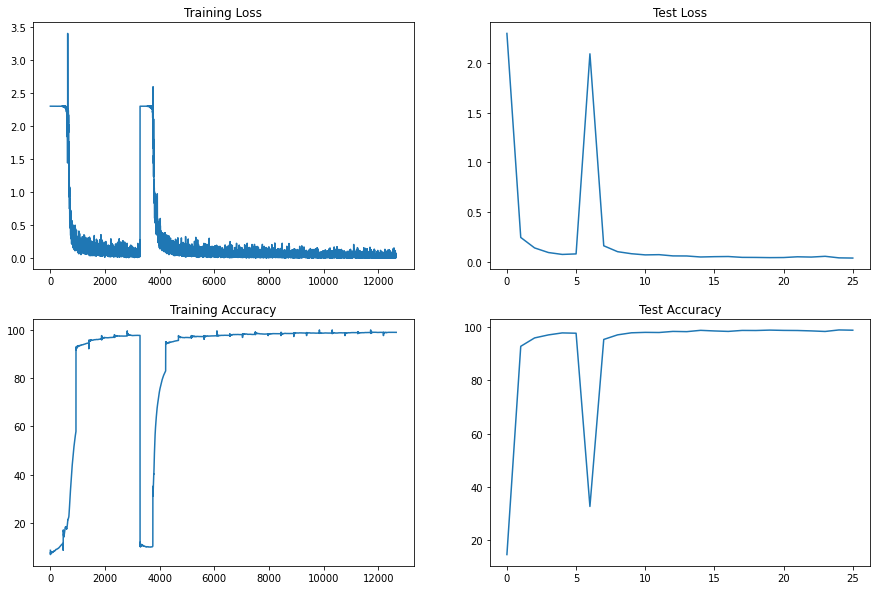

In [85]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_loss_list)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")